# 1. Install and Import Dependencies

In [2]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [3]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
!cd yolov5 & pip install -r requirements.txt

In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Raj/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-5-29 Python-3.9.13 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [10]:
img = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg"

In [11]:
results = model(img)
results.print()

image 1/1: 533x800 2 persons, 28 cars, 5 trucks
Speed: 5611.8ms pre-process, 13.8ms inference, 114.6ms NMS per image at shape (1, 3, 448, 640)


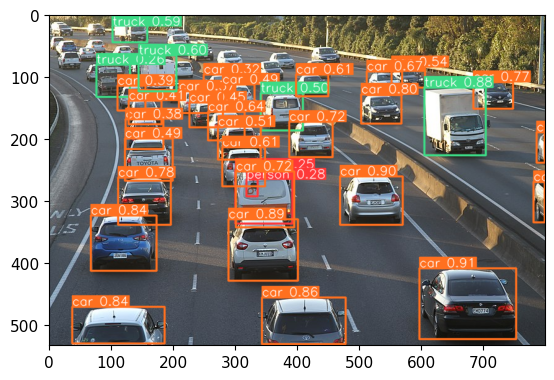

In [12]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [13]:
results.render()

[array([[[251, 216, 174],
         [254, 220, 175],
         [246, 213, 168],
         ...,
         [127, 149, 146],
         [ 67,  79,  55],
         [ 64,  70,  34]],
 
        [[235, 201, 156],
         [233, 200, 155],
         [221, 189, 142],
         ...,
         [120, 142, 140],
         [ 82,  92,  67],
         [ 46,  52,  16]],
 
        [[252, 220, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [135, 155, 154],
         [ 66,  74,  50],
         [ 58,  62,  25]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

# 4. Real Time Detections

In [15]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

# 5. Train from scratch

In [29]:
import uuid   # Unique identifier
import os
import time

In [45]:
IMAGES_PATH = r"C:\Users\Raj\Downloads\Dowsiness Detection\data\images"
labels = ['awake', 'drowsy']
number_imgs = 10


In [47]:
import os
import uuid

cap = cv2.VideoCapture(0)

# Loop through labels
for label in labels:
    print(f'Collecting images for {label}')
    time.sleep(5)

    # Loop through image range
    for img_num in range(number_imgs):
        print(f'Collecting images for {label}, image number {img_num}')

        # Webcam feed
        ret, frame = cap.read()

        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, f"{label}.{uuid.uuid1()}.jpg")

        # Writes out image to file
        cv2.imwrite(imgname, frame)

        # Render to the screen
        cv2.imshow('Image Collection', frame)

        # 2 second delay between captures
        time.sleep(2)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [22]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.baaac68e-1e46-11ef-a3df-902e167e956f.jpg


In [48]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

C:\Users\Raj\Downloads\Dowsiness Detection\data\images\awake.190758b4-1e64-11ef-ad4a-902e167e956f.jpg
C:\Users\Raj\Downloads\Dowsiness Detection\data\images\awake.190758b5-1e64-11ef-971a-902e167e956f.jpg
C:\Users\Raj\Downloads\Dowsiness Detection\data\images\awake.190758b6-1e64-11ef-b9fa-902e167e956f.jpg
C:\Users\Raj\Downloads\Dowsiness Detection\data\images\awake.190758b7-1e64-11ef-889c-902e167e956f.jpg
C:\Users\Raj\Downloads\Dowsiness Detection\data\images\awake.190758b8-1e64-11ef-aeac-902e167e956f.jpg
C:\Users\Raj\Downloads\Dowsiness Detection\data\images\awake.190758b9-1e64-11ef-a1c2-902e167e956f.jpg
C:\Users\Raj\Downloads\Dowsiness Detection\data\images\awake.190758ba-1e64-11ef-8cfe-902e167e956f.jpg
C:\Users\Raj\Downloads\Dowsiness Detection\data\images\awake.190758bb-1e64-11ef-b83a-902e167e956f.jpg
C:\Users\Raj\Downloads\Dowsiness Detection\data\images\awake.190758bc-1e64-11ef-b2e6-902e167e956f.jpg
C:\Users\Raj\Downloads\Dowsiness Detection\data\images\awake.190758bd-1e64-11ef-af

In [49]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [50]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [55]:
!pip install --upgrade jax jaxlib

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.4 which is incompatible.



  Using cached jax-0.4.28-py3-none-any.whl (1.9 MB)
  Attempting uninstall: jax
    Found existing installation: jax 0.4.8
    Uninstalling jax-0.4.8:
      Successfully uninstalled jax-0.4.8


In [3]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 0

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 3 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-315-g892e8a82 Python-3.9.13 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epo

# 6. Load Custom Model

In [21]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='C:/Users/Raj/yolov5/runs/train/exp8/weights/last.pt', force_reload=False)

Using cache found in C:\Users\Raj/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-5-30 Python-3.9.13 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [22]:
img = r"C:\Users\Raj\Downloads\Dowsiness Detection\data\images\drowsy.f50b07b2-1e63-11ef-bb18-902e167e956f.jpg"

In [23]:
results = model(img)

In [24]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 5.2ms pre-process, 12.0ms inference, 82.2ms NMS per image at shape (1, 3, 480, 640)


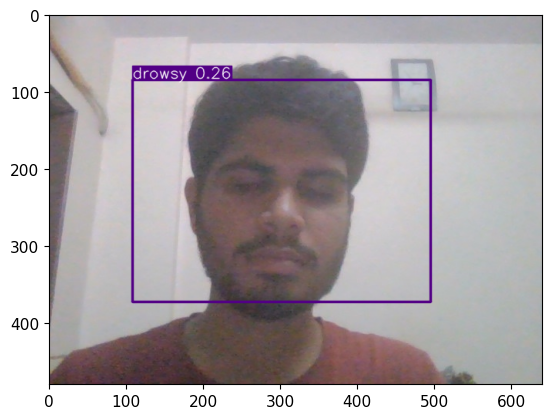

In [25]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()